In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import empiricaldist

## Análisis univariado

In [2]:
raw_penguins = pd.read_csv("data/raw_penguins.csv")
raw_penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
raw_penguins.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [4]:
# Total de tipos de datos
raw_penguins.dtypes.value_counts()

object     10
float64     6
int64       1
Name: count, dtype: int64

In [5]:
# Dimensión del conjunto de datos
raw_penguins.shape

(344, 17)

In [6]:
# ¿Existen valores nulos?
raw_penguins.isnull().sum()[raw_penguins.isnull().any()]

Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

In [7]:
# Total de valores nulos
int(
    raw_penguins
      .isnull()
      .sum()
      .sum()
)

336

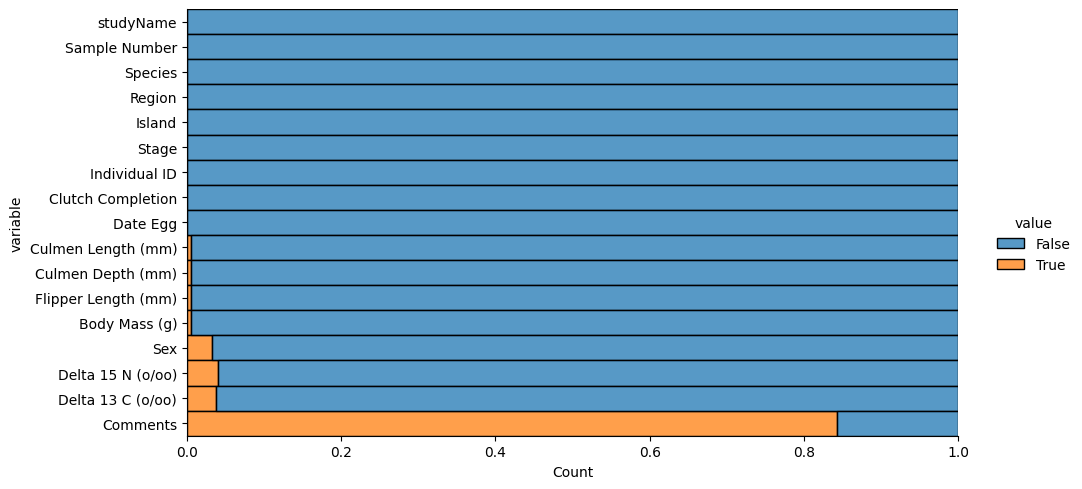

In [8]:
# Gráfica de proporción de nulos
(
    raw_penguins
        .isnull()
        .melt()
        .pipe(
            lambda df: (
              sns.displot(
                  data = df,
                  y = 'variable',
                  hue = 'value',
                  multiple = 'fill',
                  aspect = 2
              )
            )
        )
)

In [9]:
# Listar columnas
raw_penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [10]:
# Selección de columnas necesarias
preprocess_penguins = raw_penguins[[
    'Species', 'Region', 'Island', 'Date Egg', 'Culmen Length (mm)',
    'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex'
]]

In [11]:
# Renombrar columnas
column_mapping = {
    "Species": "species",
    "Region": "region",
    "Island": "island",
    "Date Egg": "date_egg",
    "Culmen Length (mm)": "culmen_length_mm",
    "Culmen Depth (mm)": "culmen_depth_mm",
    "Flipper Length (mm)": "flipper_length_mm",
    "Body Mass (g)": "body_mass_g",
    "Sex": "sex",
}
preprocess_penguins = preprocess_penguins.rename(columns=column_mapping)

In [12]:
preprocess_penguins.head(3)

,species,region,island,date_egg,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,2007-11-11,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE


In [13]:
# Convertir a fecha
preprocess_penguins["date_egg"] = pd.to_datetime(preprocess_penguins["date_egg"])

In [14]:
preprocess_penguins.dtypes

species                      object
region                       object
island                       object
date_egg             datetime64[ns]
culmen_length_mm            float64
culmen_depth_mm             float64
flipper_length_mm           float64
body_mass_g                 float64
sex                          object
dtype: object

In [15]:
# Extraer el año de una fecha
preprocess_penguins["year_egg"] = preprocess_penguins["date_egg"].dt.year

<Axes: >

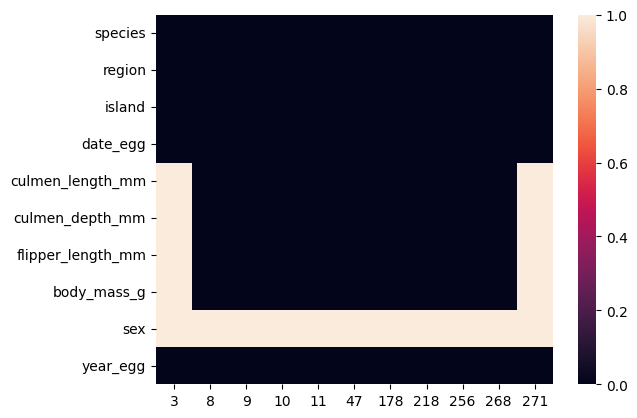

In [16]:
# Los nulos con mayor presencia están en la variable Sex ¿El resto de columnas nulas no están presentes cuando el Sex no está presente?
(
    (preprocess_penguins[preprocess_penguins.isnull().sum(axis=1) > 0]) # Filtrar aquellas filas que contengan al menos un dato nulo
        .isnull()
        .transpose()
        .pipe(
            lambda df: (
              sns.heatmap(
                  data = df,
              )
            )
        )
)

In [17]:
processed_penguins = (
    preprocess_penguins
        .dropna()
)

In [18]:
processed_penguins.shape

(333, 10)

In [19]:
# Estadísticos de variables numéricas
processed_penguins.describe()

,date_egg,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,year_egg
count,333,333.000000,333.000000,333.000000,333.000000,333.000000
mean,2008-12-01 20:54:03.243243264,43.992793,17.164865,200.966967,4207.057057,2008.042042
min,2007-11-09 00:00:00,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,2007-11-28 00:00:00,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,2008-11-09 00:00:00,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,2009-11-16 00:00:00,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,2009-12-01 00:00:00,59.600000,21.500000,231.000000,6300.000000,2009.000000
std,NaN,5.468668,1.969235,14.015765,805.215802,0.812944


In [20]:
# Estadísticos de variables categóricas
processed_penguins.describe(include = 'object')

,species,region,island,sex
count,333,333,333,333
unique,3,1,3,2
top,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,MALE
freq,146,333,163,168


<Axes: xlabel='species'>

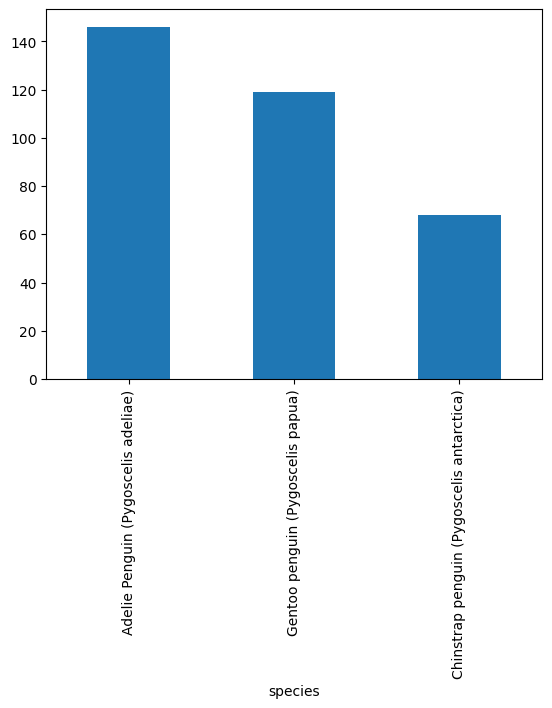

In [21]:
# Número de registros por especie
(
    processed_penguins
        .species
        .value_counts()
        .plot(kind='bar')
)

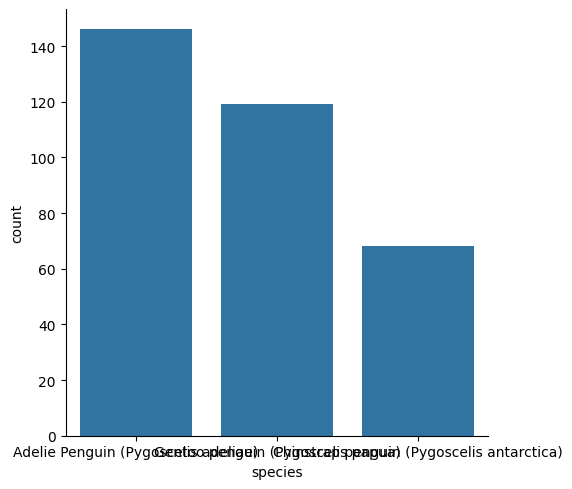

In [22]:
sns.catplot(
    data = processed_penguins,
    x = "species",
    kind = "count"
)

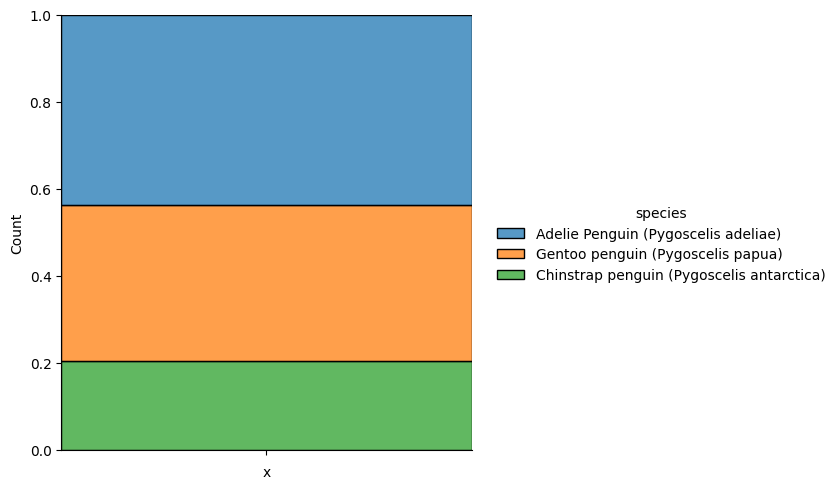

In [23]:
(
    processed_penguins
        .assign(x="")
        .pipe(
            lambda df: (
              sns.displot(
                  data = df,
                  x = 'x',
                  hue = 'species',
                  multiple = 'fill'
              )
            )
        )
)

#### Estadísticos

In [24]:
processed_penguins.mean(numeric_only = True)

culmen_length_mm       43.992793
culmen_depth_mm        17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year_egg             2008.042042
dtype: float64

In [25]:
# Rango intercuantil
processed_penguins.quantile(0.75, numeric_only = True) - processed_penguins.quantile(0.25, numeric_only = True)

culmen_length_mm        9.1
culmen_depth_mm         3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year_egg                2.0
dtype: float64

In [26]:
(
    processed_penguins
        .quantile(q = [0.25, 0.5, 0.75], numeric_only = True)
        .T
        .rename_axis("variable")
        .reset_index()
        .assign(
            iqr = lambda df: df[0.75] - df[0.25]
        )
)

,variable,0.25,0.5,0.75,iqr
0,culmen_length_mm,39.5,44.5,48.6,9.1
1,culmen_depth_mm,15.6,17.3,18.7,3.1
2,flipper_length_mm,190.0,197.0,213.0,23.0
3,body_mass_g,3550.0,4050.0,4775.0,1225.0
4,year_egg,2007.0,2008.0,2009.0,2.0


#### Visualizar

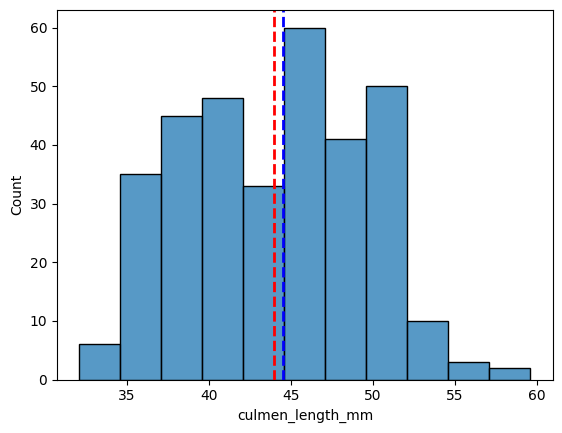

In [27]:
# Histograma
sns.histplot(
    data = processed_penguins,
    x = "culmen_length_mm"
)
plt.axvline(
    x = processed_penguins.culmen_length_mm.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x = processed_penguins.culmen_length_mm.median(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

<Axes: xlabel='culmen_length_mm'>

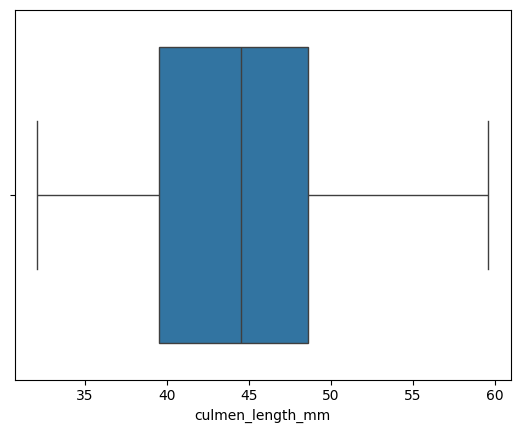

In [28]:
sns.boxplot(
    data = processed_penguins,
    x = "culmen_length_mm"
)

In [29]:
# Obtener numero de bins para un histograma
def freeman(x: pd.Series) -> float:
    iqr = x.quantile(0.75) - x.quantile(0.25)
    n = len(x)
    
    return 2 * (iqr / n ** (1/3))

In [30]:
freeman(processed_penguins.culmen_length_mm)

np.float64(2.6257697664626938)

### Distribuciones

### PMFs
Función de probabilidad de masa

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

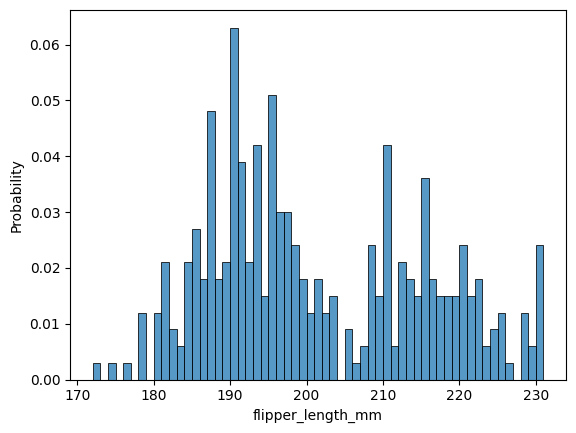

In [31]:
sns.histplot(
    data = processed_penguins,
    x = "flipper_length_mm",
    binwidth = 1,
    stat = 'probability'
)

In [32]:
import empiricaldist

In [33]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins.flipper_length_mm,
    normalize = True
)

<Axes: >

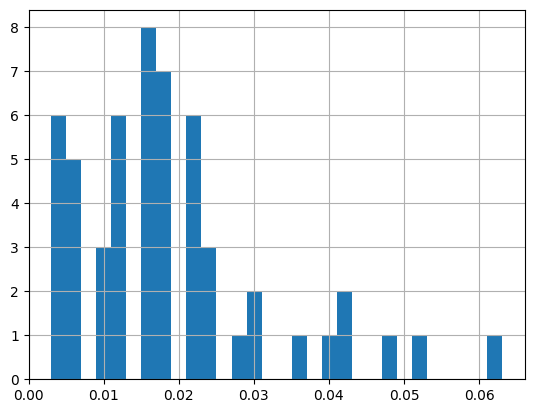

In [34]:
pmf_flipper_length_mm.hist(bins = 30)

In [35]:
round(float(pmf_flipper_length_mm(190)), 2) * 100 # Probabilidad de ocurrencia del fenomeno estudiado

6.0

### ECDFs
Funciones empíricas de probabilidad acumulada

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

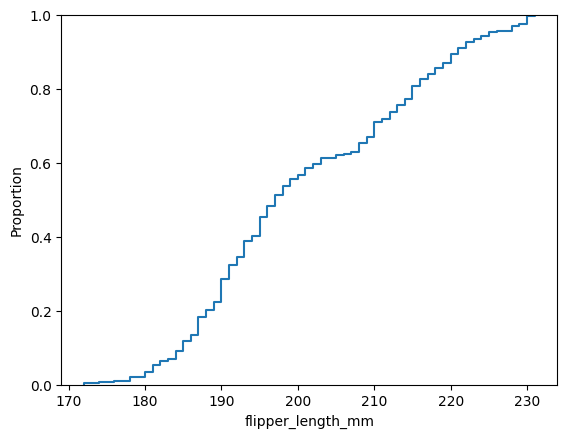

In [36]:
sns.ecdfplot(
    data = processed_penguins,
    x = 'flipper_length_mm'
)

In [37]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins.flipper_length_mm,
    normalize = True
)

<Axes: xlabel='flipper_length_mm'>

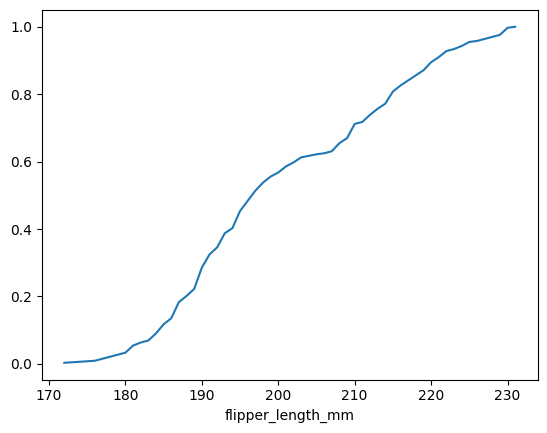

In [38]:
cdf_flipper_length_mm.plot()

In [39]:
round(float(cdf_flipper_length_mm(210)), 2) # Probabilidad acumulada

0.71

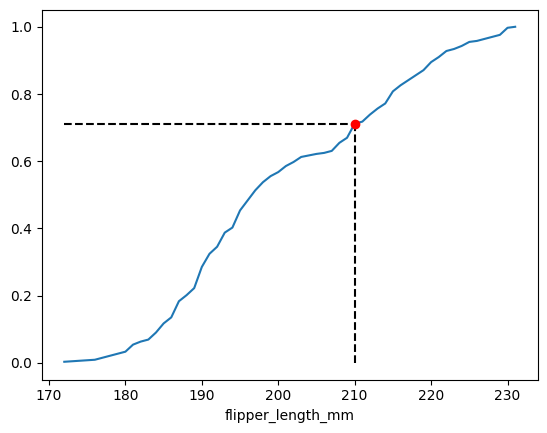

In [40]:
cdf_flipper_length_mm.plot()
q = 210
p = round(float(cdf_flipper_length_mm(210)), 2)
plt.vlines(x = q, ymin = 0, ymax = p, colors = "black", linestyle = 'dashed')
plt.hlines(y = p, xmin = pmf_flipper_length_mm.qs[0], xmax = q, colors = "black", linestyle = 'dashed')
plt.plot(q, p, 'ro')

In [41]:
stats = processed_penguins.flipper_length_mm.describe()

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

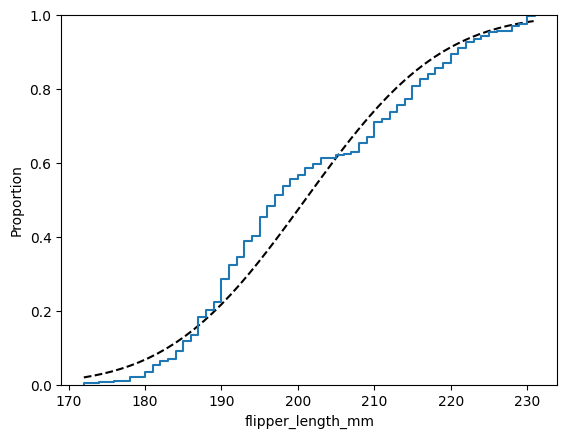

In [42]:
xs = np.linspace(stats["min"], stats["max"])
ys = scipy.stats.norm(stats["mean"], stats["std"]).cdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed')
sns.ecdfplot(
    data = processed_penguins,
    x = 'flipper_length_mm'
)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

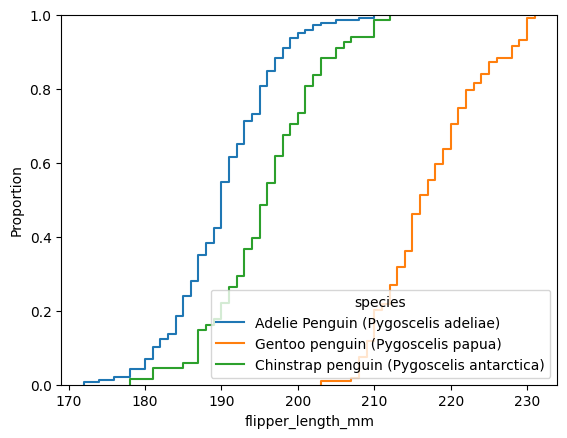

In [43]:
sns.ecdfplot(
    data = processed_penguins,
    x = 'flipper_length_mm',
    hue = 'species'
)

### Función de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

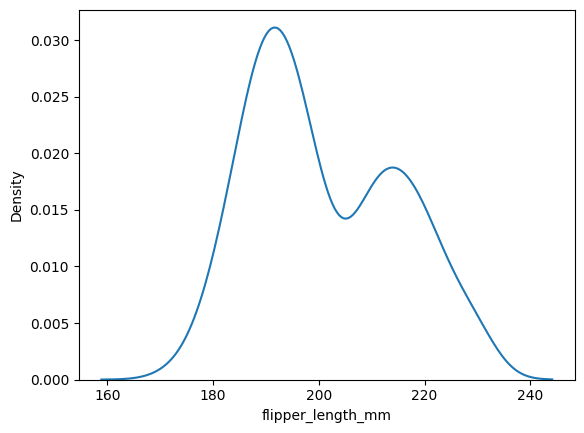

In [44]:
sns.kdeplot(
    data = processed_penguins,
    x = 'flipper_length_mm'
)

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

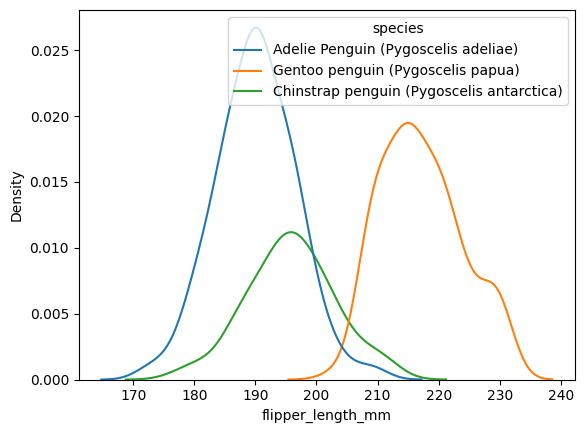

In [45]:
sns.kdeplot(
    data = processed_penguins,
    x = 'flipper_length_mm',
    hue = 'species'
)

### Ley de los grandes números

In [46]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])

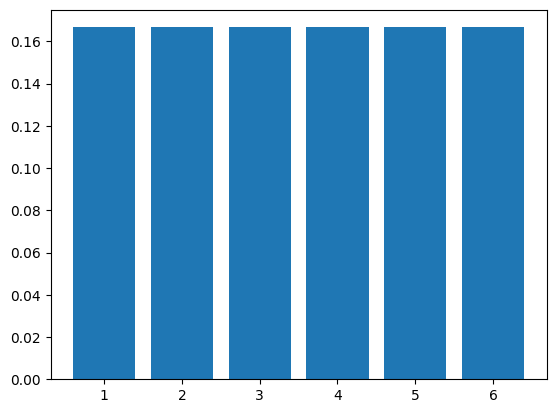

In [47]:
# Probabilidad de tirar un dado
dice.bar()

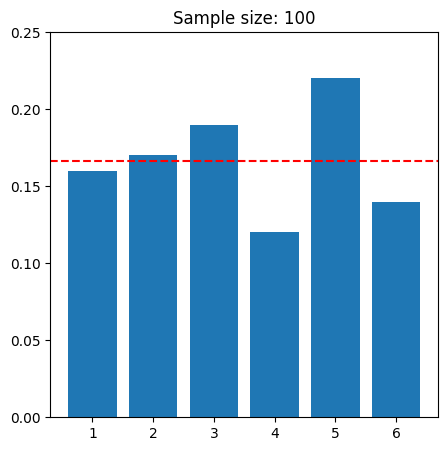

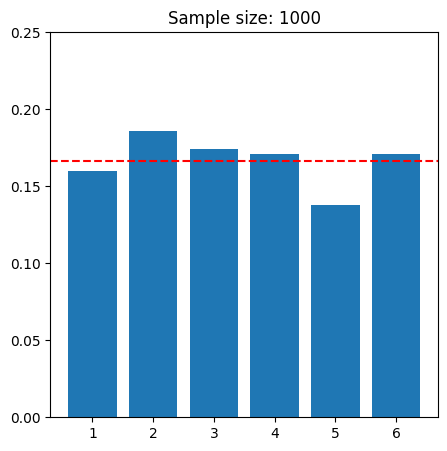

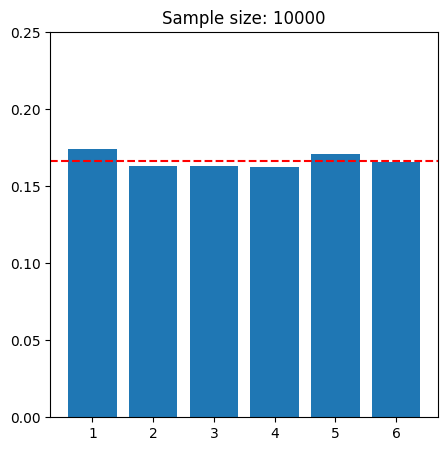

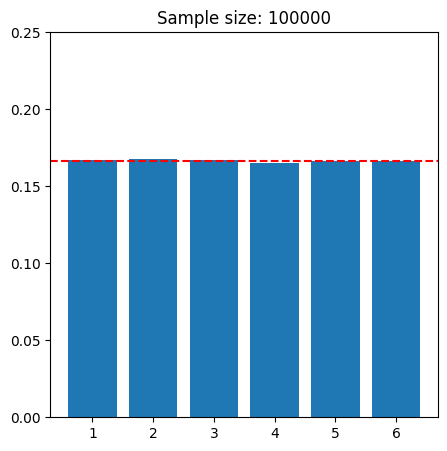

In [48]:
for sample_size in (1e2, 1e3, 1e4, 1e5):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize = (5, 5))
    sample_pmf.bar()
    plt.axhline(y = 1/6, color = "red", linestyle = 'dashed')
    plt.ylim([0, 0.25])
    plt.title(f"Sample size: {sample_size}")

### Simulaciones

In [49]:
(
    processed_penguins["sex"].value_counts(normalize = True)
)

sex
MALE      0.504505
FEMALE    0.495495
Name: proportion, dtype: float64

<Axes: xlabel='sex'>

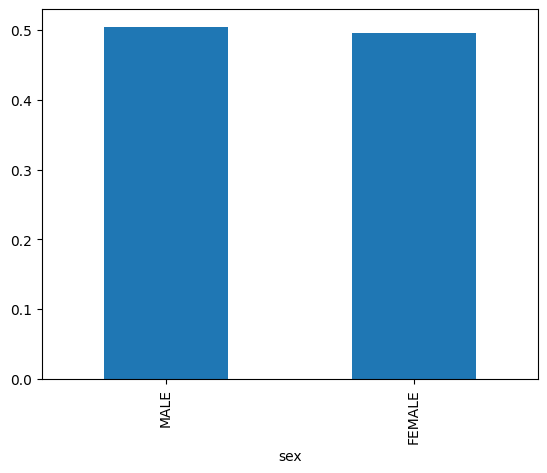

In [50]:
(
    processed_penguins["sex"]
        .value_counts(normalize = True)
        .plot(kind = "bar")
)

In [51]:
pd.set_option('future.no_silent_downcasting', True)

sex_numeric = (
    processed_penguins["sex"]
        .replace(["MALE", "FEMALE"], [1, 0])
        .astype(int)
)

In [52]:
number_samples = 1000
sample_size = 35
samples_dict = {}

np.random.seed(20250523)
for i in range(1, number_samples + 1):
    samples_dict[f"sample - {i}"] = sex_numeric.sample(sample_size, replace = True).to_numpy()

sample_df = pd.DataFrame(samples_dict)
sample_df.mean().mean()

np.float64(0.5086857142857143)

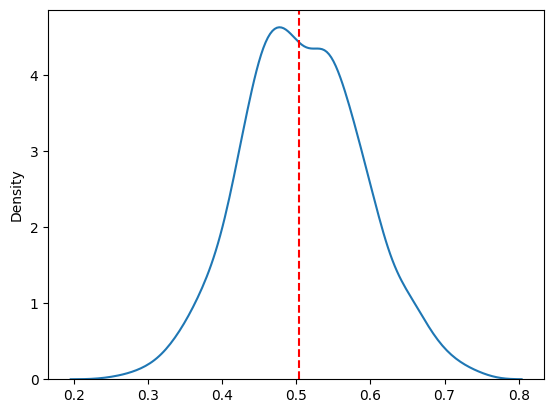

In [53]:
sns.kdeplot(data = sample_df.mean())
plt.axvline(x = sex_numeric.mean(), color = 'red', linestyle = 'dashed')

In [54]:
sample_size_experiment = pd.DataFrame(
    [[i, sample_df.iloc[:, :i].mean().mean()] for i in range(1, number_samples + 1)],
    columns = ["sample_size", "estimate_mean"]
)

In [55]:
sample_size_experiment

,sample_size,estimate_mean
0,1,0.628571
1,2,0.571429
2,3,0.523810
3,4,0.521429
4,5,0.525714
...,...,...
995,996,0.508434
996,997,0.508411
997,998,0.508503
998,999,0.508594


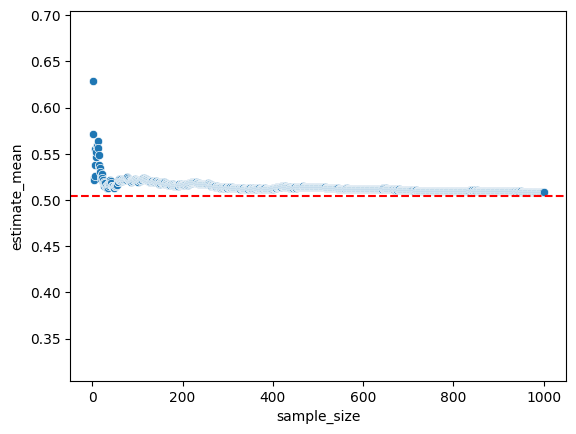

In [56]:
# Convergencia de la media a medida del tamaño de repeticiones del experimento
sns.scatterplot(
    data = sample_size_experiment,
    x = 'sample_size',
    y = 'estimate_mean'
)

plt.axhline(
    y = sex_numeric.mean(),
    color = 'red',
    linestyle = 'dashed'
)

plt.ylim(
    [sex_numeric.mean() - 0.2, sex_numeric.mean() + 0.2]
)
plt.show()

## Análisis bivariado

### Gráficas en dos dimensiones

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

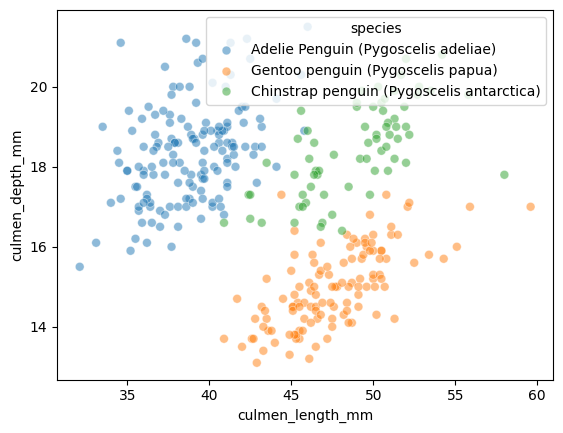

In [57]:
sns.scatterplot(
    data = processed_penguins,
    x = "culmen_length_mm",
    y = "culmen_depth_mm",
    alpha = 0.5,
    s = 40,
    hue = "species"
)

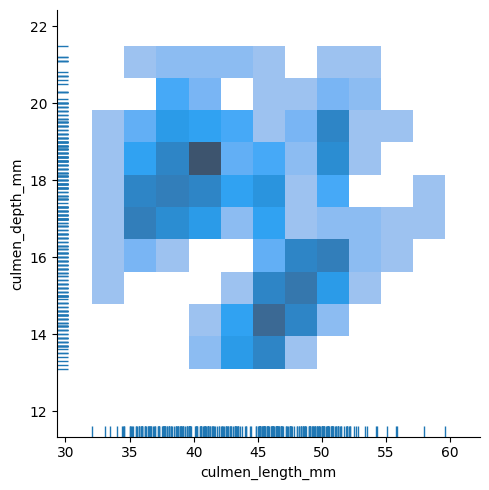

In [58]:
sns.displot(
    data = processed_penguins,
    x = "culmen_length_mm",
    y = "culmen_depth_mm",
    rug = True
)

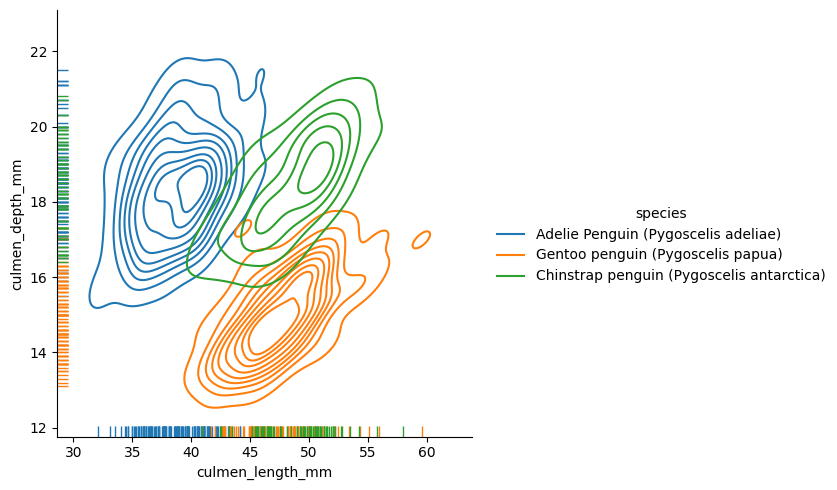

In [59]:
sns.displot(
    data = processed_penguins,
    x = "culmen_length_mm",
    y = "culmen_depth_mm",
    rug = True,
    kind = "kde",
    hue = "species"
)

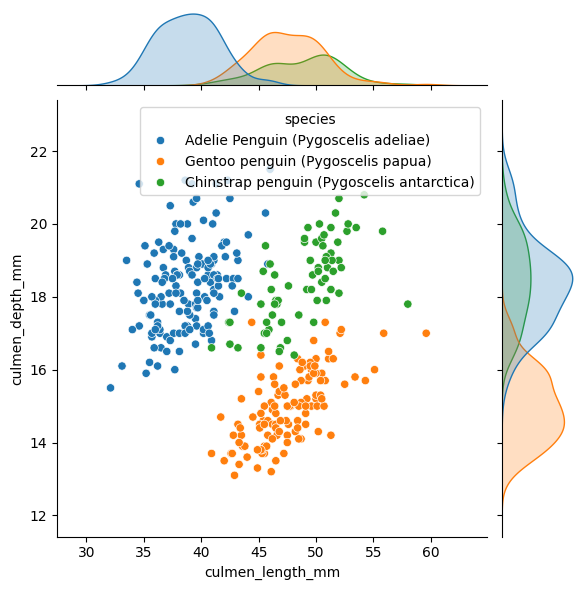

In [60]:
sns.jointplot(
    data = processed_penguins,
    x = "culmen_length_mm",
    y = "culmen_depth_mm",
    hue = "species"
)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

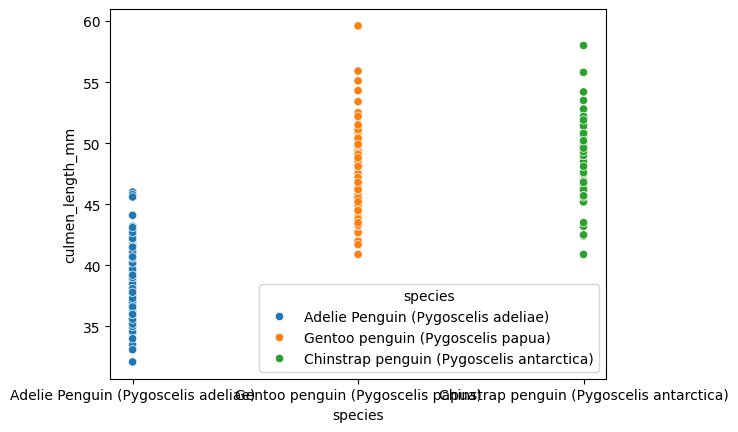

In [61]:
sns.scatterplot(
    data = processed_penguins,
    x = "species",
    y = "culmen_length_mm",
    hue = "species"
)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

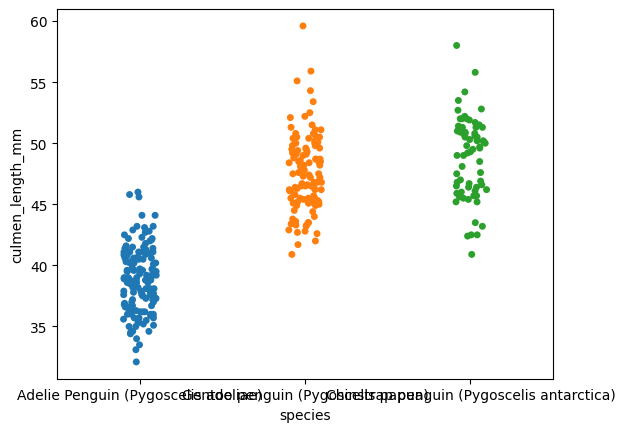

In [62]:
sns.stripplot(
    data = processed_penguins,
    x = "species",
    y = "culmen_length_mm",
    hue = "species"
)

<Axes: xlabel='culmen_length_mm', ylabel='species'>

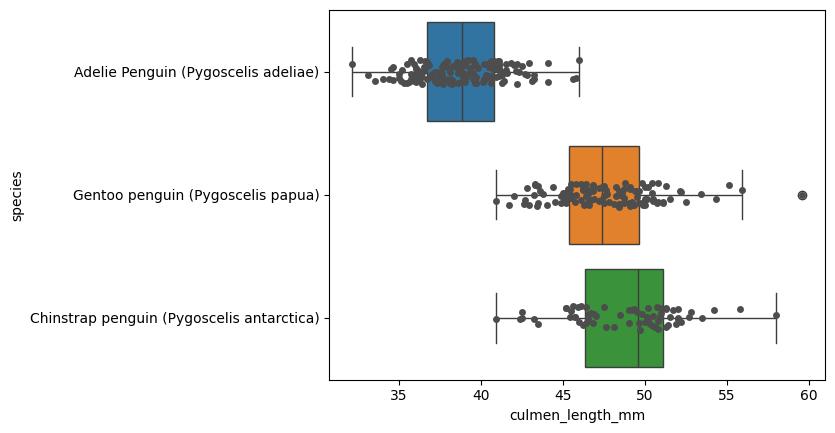

In [63]:
sns.boxplot(
    data = processed_penguins,
    y = "species",
    x = "culmen_length_mm",
    hue = "species"
)

sns.stripplot(
    data = processed_penguins,
    y = "species",
    x = "culmen_length_mm",
    color = ".3"
)

<Axes: xlabel='culmen_length_mm', ylabel='species'>

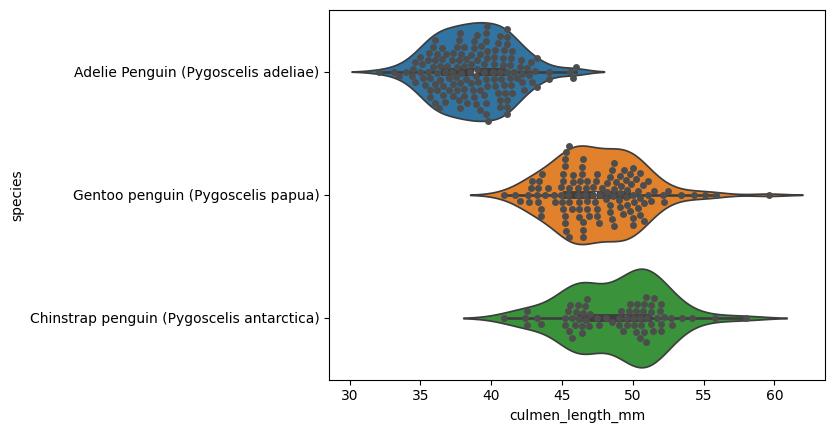

In [64]:
sns.violinplot(
    data = processed_penguins,
    y = "species",
    x = "culmen_length_mm",
    hue = "species"
)

sns.swarmplot(
    data = processed_penguins,
    y = "species",
    x = "culmen_length_mm",
    color = ".3"
)

<Axes: xlabel='culmen_length_mm', ylabel='species'>

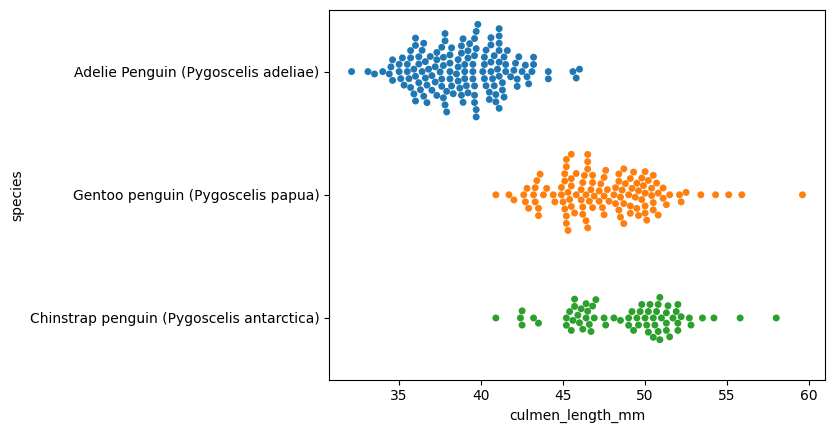

In [65]:
sns.swarmplot(
    data = processed_penguins,
    y = "species",
    x = "culmen_length_mm",
    hue = "species"
)

### Matrices de correlación

#### Valores numéricos

In [66]:
processed_penguins.corr(numeric_only = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,year_egg
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year_egg,0.032657,-0.048182,0.151068,0.021862,1.000000


<Axes: >

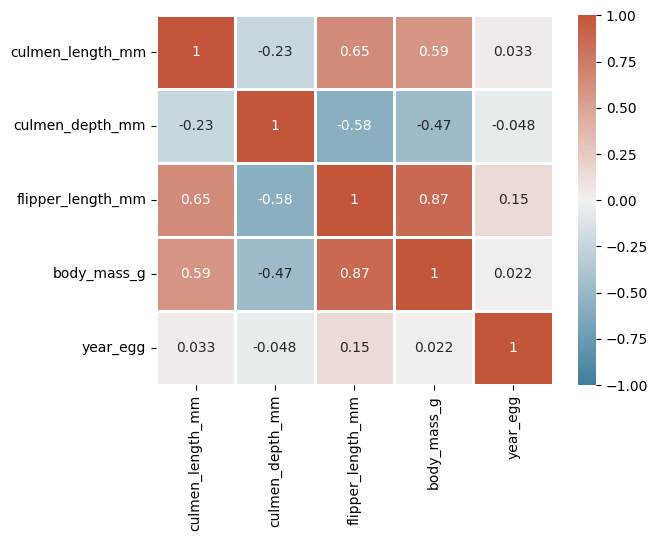

In [67]:
sns.heatmap(
    data = processed_penguins.corr(numeric_only = True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.8, # Contorno de los cuadros,
    annot = True, # Dejar el valor sobre el cuadrado
    cmap = sns.diverging_palette(230, 20, as_cmap = True) # Cambiar la paleta de colores
)

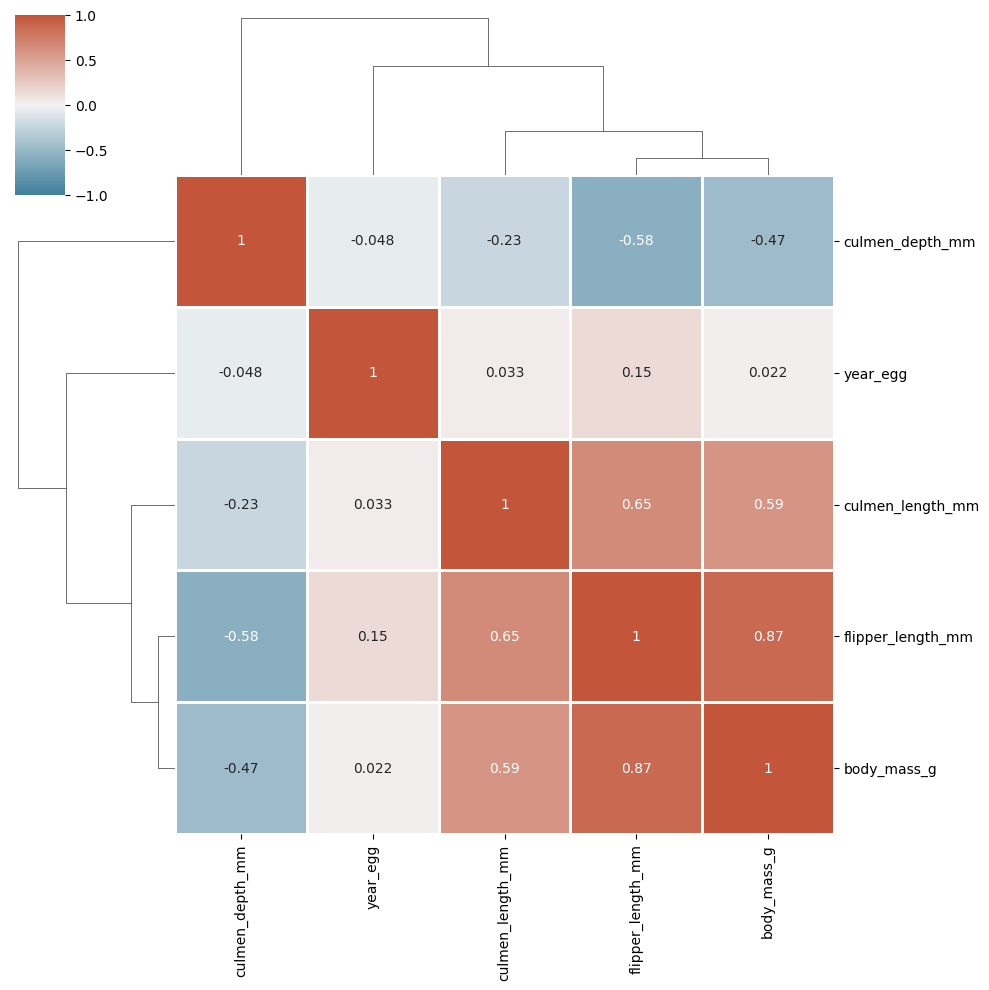

In [68]:
sns.clustermap(
    data = processed_penguins.corr(numeric_only = True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.8, # Contorno de los cuadros,
    annot = True, # Dejar el valor sobre el cuadrado
    cmap = sns.diverging_palette(230, 20, as_cmap = True) # Cambiar la paleta de colores
)

##### Valores categóricos

In [69]:
processed_penguins = (
    processed_penguins
    .assign(
        sex_numeric = lambda df: df.sex.replace(["MALE", "FEMALE"], [0, 1]).astype(int)
    )
)

<Axes: >

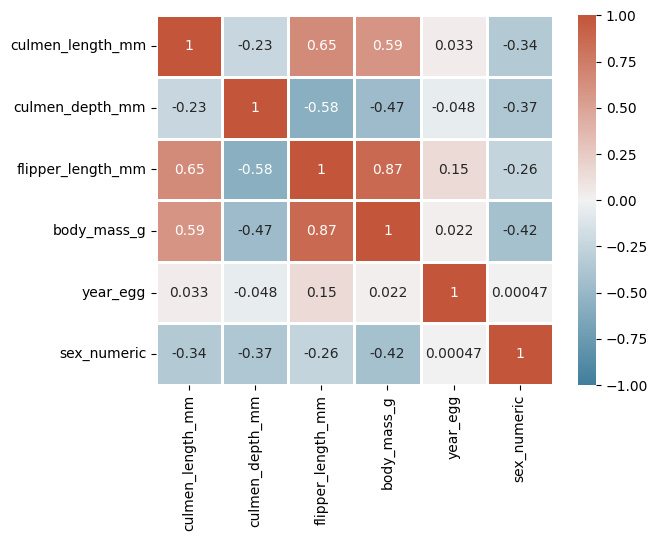

In [70]:
sns.heatmap(
    data = processed_penguins.corr(numeric_only = True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.8, # Contorno de los cuadros,
    annot = True, # Dejar el valor sobre el cuadrado
    cmap = sns.diverging_palette(230, 20, as_cmap = True) # Cambiar la paleta de colores
)

#### Limitantes de los coeficientes de correlacion lineal

<Axes: >

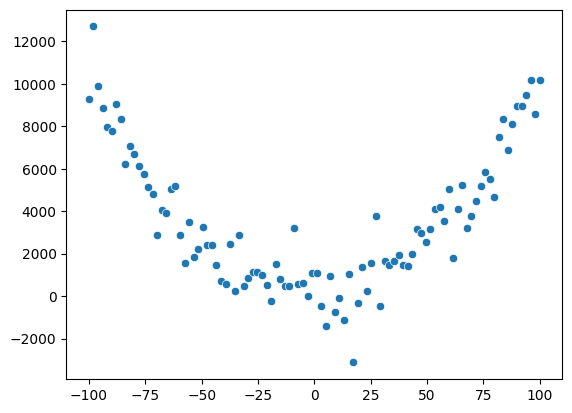

In [71]:
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x = x, y = y)

In [72]:
np.corrcoef(x, y)

array([[1.        , 0.00209804],
       [0.00209804, 1.        ]])

<Axes: >

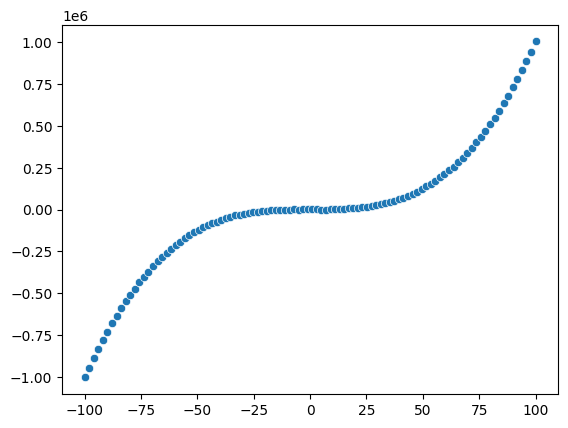

In [73]:
x = np.linspace(-100, 100, 100)
y = x ** 3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x = x, y = y)

In [74]:
np.corrcoef(x, y) # las colas de la anterior grafica se "contrarrestan" por lo que tiene una correlacion alta sin ser lineal

array([[1.        , 0.91657071],
       [0.91657071, 1.        ]])

### Simluacion

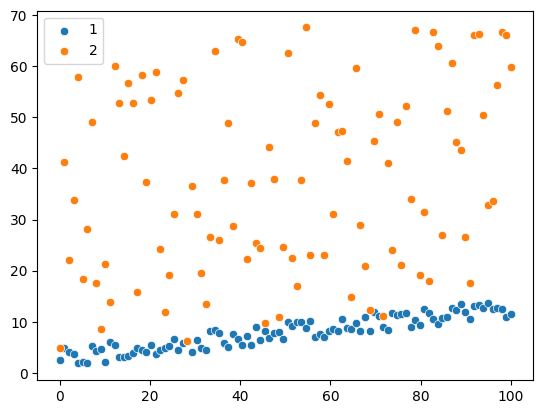

In [75]:
np.random.seed(42)

x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size = x_1.size)
x_2 = np.linspace(0, 100, 100)
y_2 = 0.1 * x_2 + 3 + np.random.uniform(0, 60, size = x_2.size)

sns.scatterplot(x = x_1, y = y_1)
sns.scatterplot(x = x_2, y = y_2)
plt.legend(labels = ["1", "2"])

In [76]:
np.corrcoef(x_1, y_1)

array([[1.        , 0.92761617],
       [0.92761617, 1.        ]])

In [77]:
np.corrcoef(x_2, y_2)

array([[1.        , 0.23860439],
       [0.23860439, 1.        ]])

In [78]:
import scipy.stats

In [79]:
res1 = scipy.stats.linregress(x_1, y_1)
res2 = scipy.stats.linregress(x_2, y_2)

print(res1)
print()
print(res2)

LinregressResult(slope=np.float64(0.10081969280979615), intercept=np.float64(2.8397383330230292), rvalue=np.float64(0.9276161661149585), pvalue=np.float64(1.0607043467839354e-43), stderr=np.float64(0.004101050284084736), intercept_stderr=np.float64(0.2373714102742458))

LinregressResult(slope=np.float64(0.1470008424819229), intercept=np.float64(30.519861265205222), rvalue=np.float64(0.23860439159521393), pvalue=np.float64(0.01681701335029089), stderr=np.float64(0.060436575031364514), intercept_stderr=np.float64(3.498107570885822))


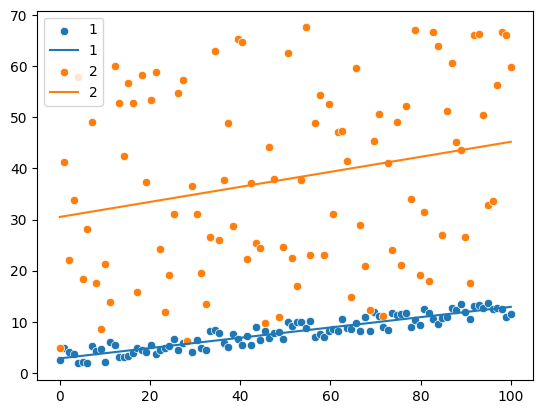

In [80]:
sns.scatterplot(x = x_1, y = y_1)
plt.plot(
    np.array([x_1.min(), x_1.max()]),
    res1.intercept + res1.slope * np.array([x_1.min(), x_1.max()])
)

sns.scatterplot(x = x_2, y = y_2)
plt.plot(
    np.array([x_2.min(), x_2.max()]),
    res2.intercept + res2.slope * np.array([x_2.min(), x_2.max()])
)

plt.legend(labels = ["1", "1", "2", "2"])
plt.show()

### Modelado

In [81]:
import statsmodels.formula.api as smf

In [82]:
model_1 = (
    smf.ols(
        formula = "body_mass_g ~ culmen_length_mm",
        data = processed_penguins
    ).fit()
)

In [83]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.54e-32
Time:                        17:29:36   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          388.8452    289.817      1.342      0.181    -181.271     958.961
culmen_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
model_2 = (
    smf.ols(
        formula = "body_mass_g ~ culmen_length_mm + culmen_depth_mm",
        data = processed_penguins
    ).fit()
)

In [85]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           7.04e-46
Time:                        17:29:36   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3413.4519    437.911      7.795      0.000    2552.002    4274.902
culmen_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
culmen_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model_3 = (
    smf.ols(
        formula = "body_mass_g ~ culmen_length_mm + culmen_depth_mm + flipper_length_mm",
        data = processed_penguins
    ).fit()
)

In [87]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          9.26e-103
Time:                        17:29:37   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
culmen_length_mm      3.2929      5.366      0.614      0.540      -7.263      13.849
culmen_depth_mm      17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
model_4 = (
    smf.ols(
        formula = "body_mass_g ~ culmen_length_mm + culmen_depth_mm + flipper_length_mm + C(sex)",
        data = processed_penguins
    ).fit()
)

In [89]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          6.28e-122
Time:                        17:29:37   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.MALE]      541.0285     51.710     10.463      0.000     439.304     642.753
culmen_length_mm     -2.3287      4.684     -0.497      0.619     -11.544       6.886
culmen_depth_mm     -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
models_results = pd.DataFrame(
    dict(
        actual_value = processed_penguins["body_mass_g"],
        predicted_model1 = model_1.predict(),
        predicted_model2 = model_2.predict(),
        predicted_model3 = model_3.predict(),
        predicted_model4 = model_4.predict(),
        species = processed_penguins.species,
        sex = processed_penguins.sex
    )
)

In [96]:
models_results.head(3)

,actual_value,predicted_model1,predicted_model2,predicted_model3,predicted_model4,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,Adelie Penguin (Pygoscelis adeliae),MALE
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,Adelie Penguin (Pygoscelis adeliae),FEMALE
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,Adelie Penguin (Pygoscelis adeliae),FEMALE


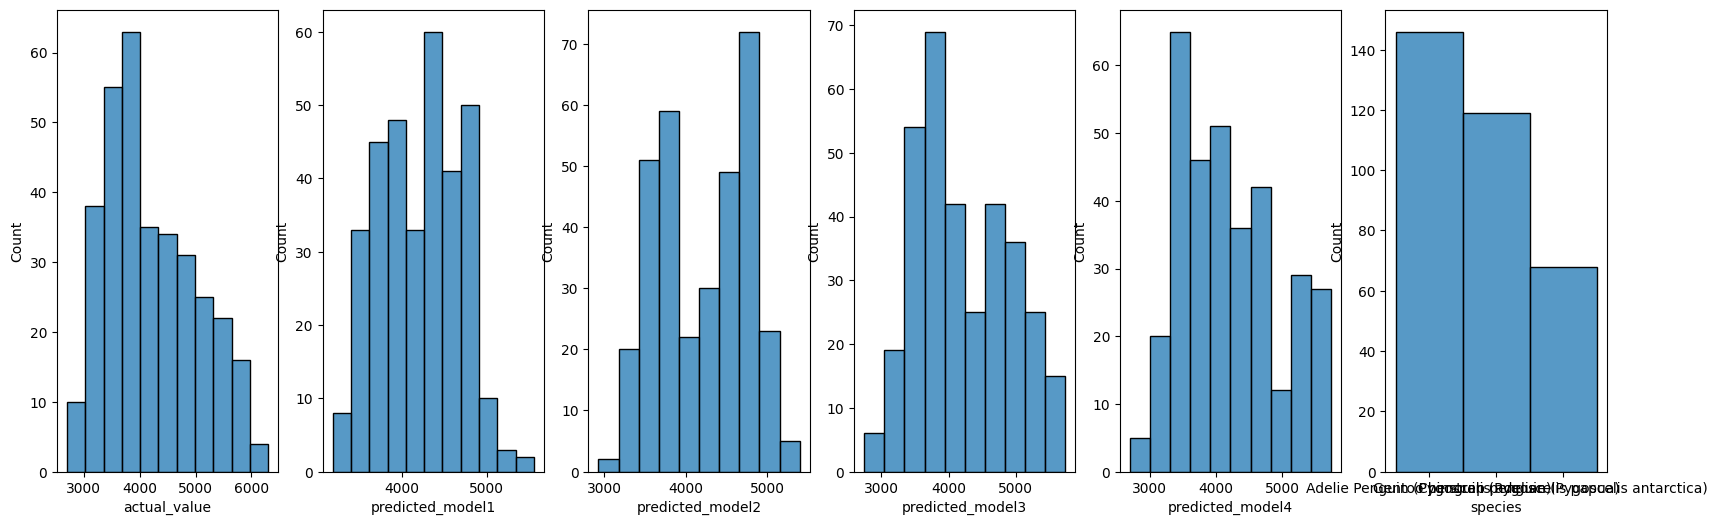

In [98]:
fig, ax = plt.subplots(1, 6, figsize = (20, 6))

for i, model in enumerate(models_results.columns[0:6]):
    sns.histplot(
        data = models_results,
        x = model,
        ax = ax[i]
    )

<Axes: ylabel='Proportion'>

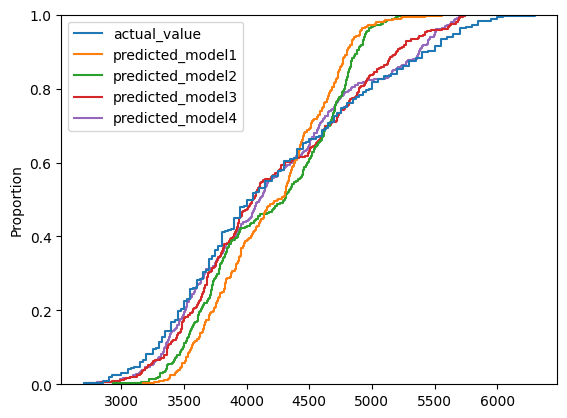

In [100]:
sns.ecdfplot(
    data = models_results
)

<Axes: ylabel='Proportion'>

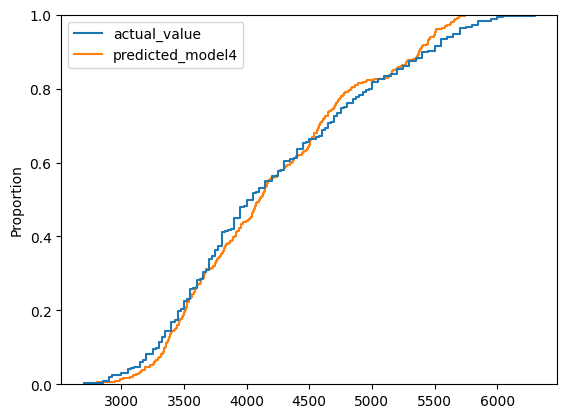

In [101]:
# Aproximación que más se acercó
sns.ecdfplot(
    data = models_results[["actual_value", "predicted_model4"]]
)

<Axes: ylabel='Proportion'>

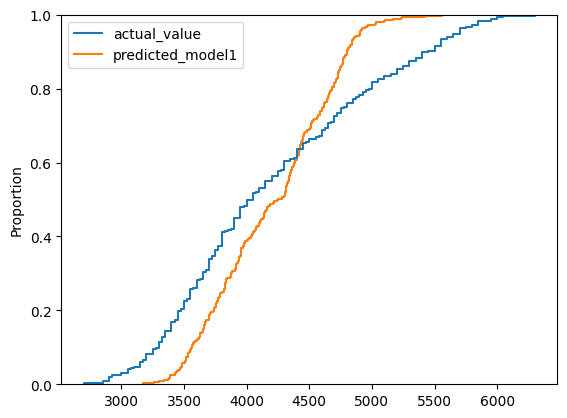

In [102]:
sns.ecdfplot(
    data = models_results[["actual_value", "predicted_model1"]]
)

<Axes: ylabel='Density'>

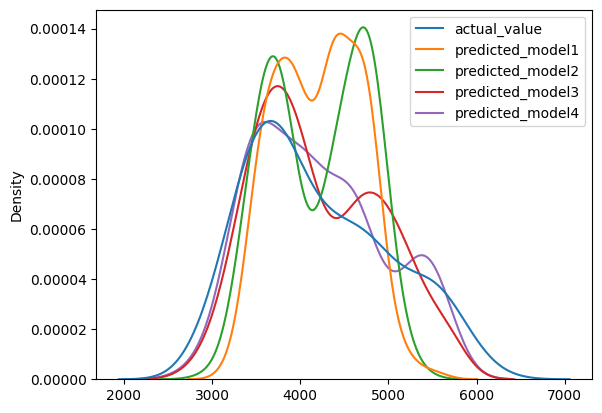

In [104]:
sns.kdeplot(
    data = models_results
)

<Axes: ylabel='Density'>

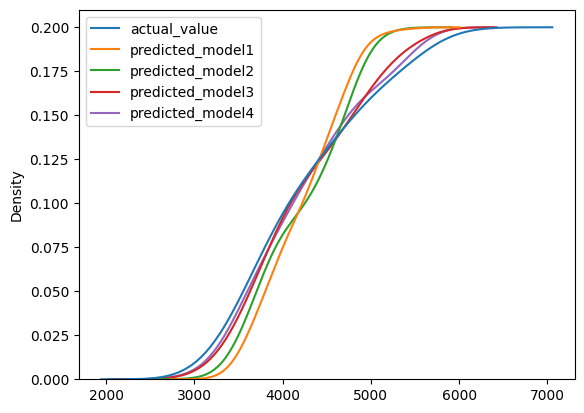

In [105]:
sns.kdeplot(
    data = models_results,
    cumulative = True
)

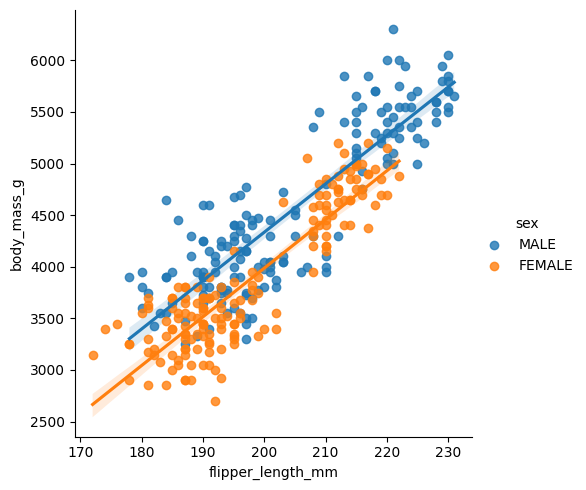

In [106]:
# Modelo separado por sexo
sns.lmplot(
    data = processed_penguins,
    x = "flipper_length_mm",
    y = "body_mass_g",
    hue = "sex"
)